In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("force2020_data_unsupervised_learning.csv")
data.head(4)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [4]:
data.isnull().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [5]:
data=data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12202 entries, 4238 to 16439
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      12202 non-null  float64
 1   GR        12202 non-null  float64
 2   DEPTH_MD  12202 non-null  float64
 3   NPHI      12202 non-null  float64
 4   PEF       12202 non-null  float64
 5   DTC       12202 non-null  float64
dtypes: float64(6)
memory usage: 667.3 KB


In [7]:
data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


In [8]:
scaler=StandardScaler()

In [9]:
data[["RHOB","GR","DEPTH_MD","NPHI","PEF","DTC"]]=scaler.fit_transform(data[["RHOB","GR","DEPTH_MD","NPHI","PEF","DTC"]])

In [10]:
data.head(4)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531
4239,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042
4240,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350
4241,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297


In [22]:
def optimize_kmeans(data, max_k):
    clusters = []
    wcss = []

    for i in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        clusters.append(i)
        wcss.append(kmeans.inertia_)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(clusters, wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.xticks(clusters)
    plt.grid()
    plt.show()

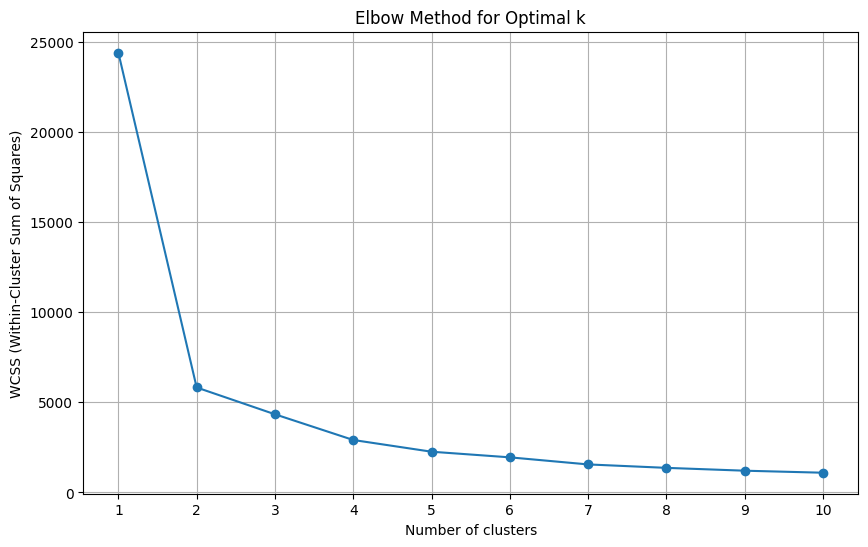

In [23]:
optimize_kmeans(data[["RHOB","NPHI"]],10)

In [24]:
kmeans=KMeans(n_clusters=2)

In [25]:
kmeans.fit(data[["RHOB","NPHI"]],10)

KMeans(n_clusters=2)

In [26]:
data["Clusters"]=kmeans.labels_

In [27]:
data.head(4)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Clusters
4238,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531,1
4239,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042,1
4240,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350,1
4241,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297,1


In [28]:
data["Clusters"].value_counts()

Clusters
1    8397
0    3805
Name: count, dtype: int64

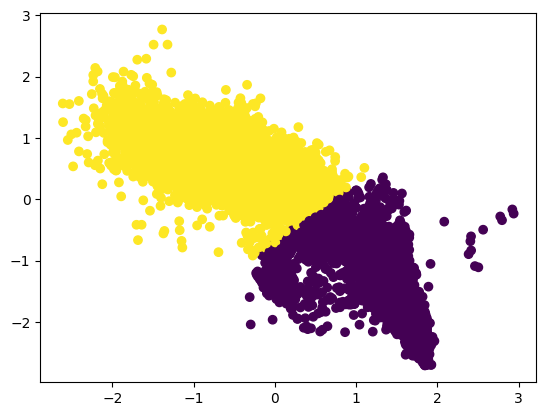

In [30]:
plt.scatter(x=data["RHOB"],y=data["NPHI"],c=data["Clusters"])
plt.show()